In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def simpleMap(tau,c):
    gamma = 10**(c[2]*np.tanh(np.log10(tau)/c[3]))
    newTau = c[0]*np.exp(-c[1]/((1 + 1/gamma + (1 - 1/gamma)*np.exp(-gamma*tau)))**(1/4))
    return newTau

/tmp/ipykernel_121/2345194165.py:2: RuntimeWarning: divide by zero encountered in log10
  gamma = 10**(c[2]*np.tanh(np.log10(tau)/c[3]))


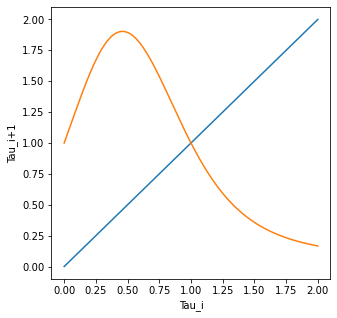

In [4]:
fig, ax = plt.subplots(1,1, figsize = (5,5))

c3a,c3b = 1,1
c2 = 30



x = np.linspace(0,2,1000)
ax.plot(x,x)

c1 = np.exp(c2*(2)**(-0.25))
y = simpleMap(x,[c1,c2,c3a,c3b])
ax.plot(x,y)


ax.set_xlabel("Tau_i")
ax.set_ylabel("Tau_i+1")



plt.show()

In [40]:
def nDeriv(f, x, args):
    delta = f(x+0.0001, args) - f(x, args)
    return delta/0.0001

In [41]:
d = nDeriv(simpleMap, 1, [c1,c2,c3a,c3b])
print(d)

-1.317686762707937


/tmp/ipykernel_24/2345194165.py:2: RuntimeWarning: divide by zero encountered in log10
  gamma = 10**(c[2]*np.tanh(np.log10(tau)/c[3]))


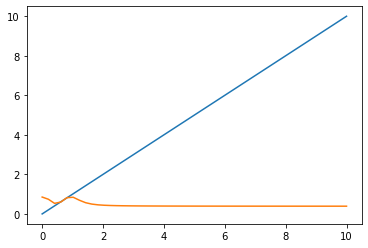

In [7]:
fig, ax = plt.subplots(1,1)
c2 = 38
c1 = np.exp(31)
c3a = 1
c3b = 1
x = np.linspace(0,10)
y = simpleMap(simpleMap(x,[c1,c2,c3a,c3b]),[c1,c2,c3a,c3b])
ax.plot(x,x)
ax.plot(x,y)


/tmp/ipykernel_94/2345194165.py:2: RuntimeWarning: divide by zero encountered in log10
  gamma = 10**(c[2]*np.tanh(np.log10(tau)/c[3]))


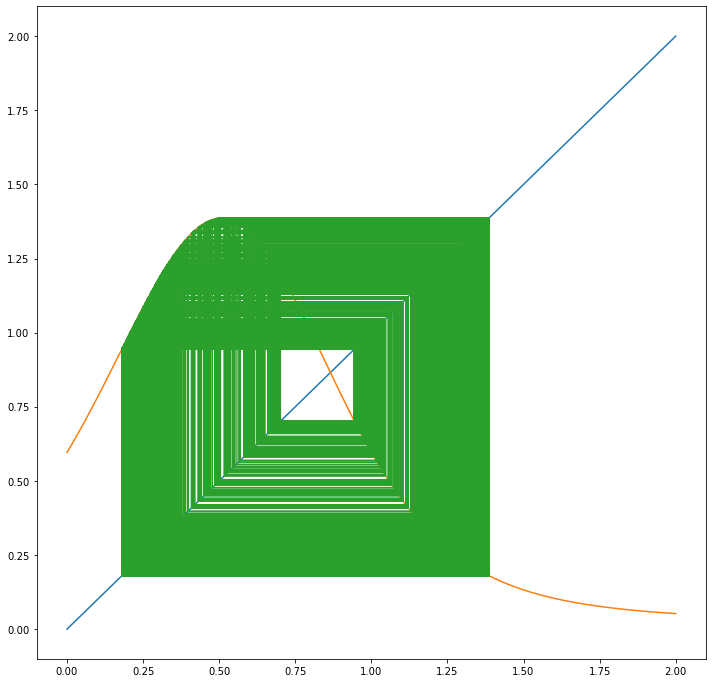

In [5]:
fig, ax = plt.subplots(1,1, figsize = (12,12))
c2 = 35.102
c1 = 0.5963*np.exp(c2*(2)**(-0.25))
c3a = 0.6428
c3b = 0.5
x = np.linspace(0,2,1000)
y = simpleMap(x,[c1,c2,c3a,c3b])
ax.plot(x,x)
ax.plot(x,y)

xi = [0.5]
yi = [0.5]
for i in range(800):
    xi.append(xi[-1])
    yi.append(simpleMap(xi[-1],[c1,c2,c3a,c3b]))
    xi.append(yi[-1])
    yi.append(yi[-1])
ax.plot(xi,yi)



plt.show()

/tmp/ipykernel_104/2345194165.py:2: RuntimeWarning: divide by zero encountered in log10
  gamma = 10**(c[2]*np.tanh(np.log10(tau)/c[3]))


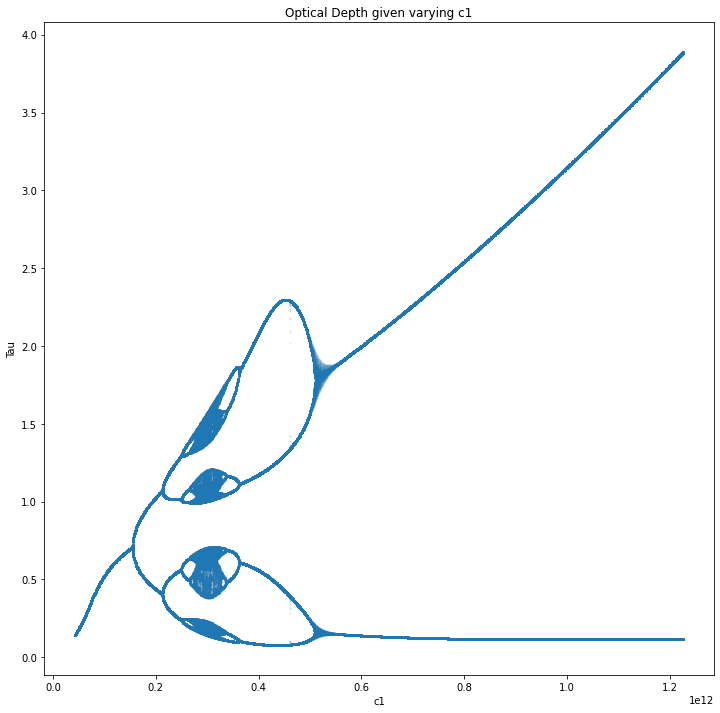

In [3]:
massLossData = [[]]

c2 = 31.836
c10 = 1*np.exp(c2*(2**(-0.25)))
c3a = 0.6816
c3b = 0.5
for i in range(1400):
    massLossArr = [0]
    for j in range(800):
        c1 = (0.1+0.002*i)*c10
        massLossArr.append(simpleMap(massLossArr[j],[c1,c2,c3a,c3b]))
    massLossData.append(massLossArr[50:])

fig1, ax = plt.subplots(figsize = (12,12))
for i in range(len(massLossData)):
    x = (0.1+0.002*(i-1))*np.ones(len(massLossData[i]))*(c10)
    ax.scatter(x,massLossData[i], s = 5, c = "tab:blue", alpha = 0.1, marker = '.')
ax.set_xlabel("c1")
ax.set_ylabel("Tau")
ax.set_title("Optical Depth given varying c1")
#plt.savefig("./bifurcationDiagram2.png")
plt.show()   

In [18]:
def lyapunovExp(f, x0, args):
    lyExp = 0
    x = x0
    for i in range(100):
        lyExp += np.log(np.abs(nDeriv(f,x,args)))
        x = f(x,args)
        print(x)
    lyExp /= 100
    return lyExp

In [30]:
c1 = 38.04
c2 = np.exp(31)
c3a = 1
c3b = 1
#print(lyapunovExp(simpleMap,1.1,[c1,c2,c3a,c3b]))
print(simpleMap(1,[c1,c2,c3a,c3b]))

0.0


In [32]:
def temp(tau, c4a, c4b):
    gamma = 10**(c4a*np.tanh(np.log10(tau)/c4b))
    temperature = ((1+1/gamma)+(1-1/gamma)*np.exp(-gamma*tau))**(1/4)
    return temperature


In [33]:
def guillot(tau, c):
    gamma = 10**(c[2]*np.tanh(np.log10(tau)/c[3]))
    newTau = c[0]*np.exp(-c[1]/((2/3 + 1/gamma + (gamma/3 - 1/gamma)*np.exp(-gamma*tau)))**(1/4))
    return newTau

In [34]:
def modifiedGuillot(tau, c):
    gamma = 10**(c[2]*np.tanh(np.log10(tau)/c[3]))
    newTau = c[0]*np.exp(-c[1]/((1 + 1/gamma + (gamma - 1/gamma)*np.exp(-gamma*tau)))**(1/4))
    return newTau

In [35]:
def pierrehumbert(tau, c):
    gamma = 10**(c[2]*np.tanh(np.log10(tau)/c[3]))
    newTau = c[0]*np.exp(-c[1]/((1 + 1/gamma + (1- 1/gamma)*np.exp(-gamma*tau)))**(1/4))
    return newTau

In [36]:
def guillotTemp(tau, c4a,c4b):
    gamma = 10**(c4a*np.tanh(np.log10(tau)/c4b))
    temperature = (2/3 + 1/gamma + (gamma/3 - 1/gamma)*np.exp(-gamma*tau))**(1/4)
    return temperature

In [37]:
def modifiedGuillotTemp(tau, c4a, c4b):
    gamma = 10**(c4a*np.tanh(np.log10(tau)/c4b))
    temperature = (1 + 1/gamma + (gamma - 1/gamma)*np.exp(-gamma*tau))**(1/4)
    return temperature

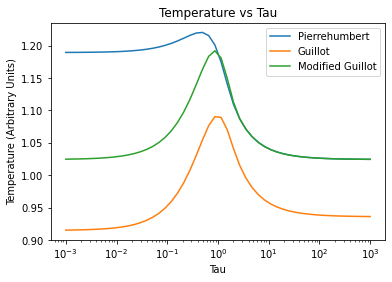

0.0


In [38]:
x = np.logspace(-3,3)
y1 = temp(x,1,1)
y2 = guillotTemp(x,1,1)
y3 = modifiedGuillotTemp(x,1,1)
fig,ax = plt.subplots(1,1)
ax.plot(x,y1, label = "Pierrehumbert")
ax.plot(x,y2, label = "Guillot")
ax.plot(x,y3, label = "Modified Guillot")
ax.set_xscale("log")
ax.legend()
ax.set_xlabel("Tau")
ax.set_ylabel("Temperature (Arbitrary Units)")
ax.set_title("Temperature vs Tau")
plt.show()

/tmp/ipykernel_126/1772197127.py:2: RuntimeWarning: divide by zero encountered in log10
  gamma = 10**(c[2]*np.tanh(np.log10(tau)/c[3]))


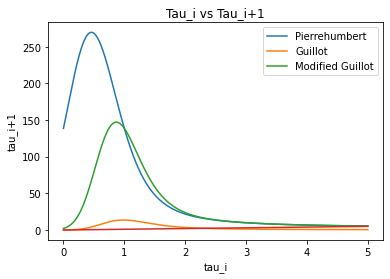

In [17]:
x = np.linspace(0,5,1000)
c = [np.exp(31),31,1,1]
y1 = pierrehumbert(x,c)
y2 = guillot(x,c)
y3 = modifiedGuillot(x,c)
fig,ax = plt.subplots(1,1)
ax.plot(x,y1, label = "Pierrehumbert")
ax.plot(x,y2, label = "Guillot")
ax.plot(x,y3, label = "Modified Guillot")
ax.plot(x,x)
ax.set_xlabel("tau_i")
ax.set_ylabel("tau_i+1")
ax.set_title("Tau_i vs Tau_i+1")
ax.legend()
plt.show()

/tmp/ipykernel_42/1772197127.py:2: RuntimeWarning: divide by zero encountered in log10
  gamma = 10**(c[2]*np.tanh(np.log10(tau)/c[3]))


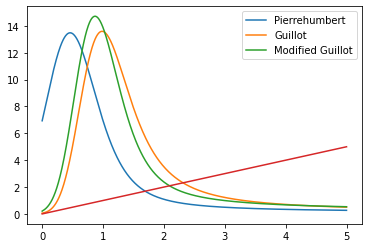

In [23]:
x = np.linspace(0,5,1000)
c1 = [0.05*np.exp(31),31,1,1]
c2 = [np.exp(31),31,1,1]
c3 = [0.1*np.exp(31),31,1,1]
y1 = pierrehumbert(x,c1)
y2 = guillot(x,c2)
y3 = modifiedGuillot(x,c3)
fig,ax = plt.subplots(1,1)
ax.plot(x,y1, label = "Pierrehumbert")
ax.plot(x,y2, label = "Guillot")
ax.plot(x,y3, label = "Modified Guillot")
ax.plot(x,x)
ax.legend()
plt.show()

0.1


/tmp/ipykernel_24/1121704929.py:2: RuntimeWarning: divide by zero encountered in log10
  gamma = 10**(1*np.tanh(np.log10(tau)/1))
